In [1]:
#!pip install pyodbc


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
from datetime import datetime


In [3]:
START_DATE ='2019-9-1' #input(str())
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))

In [4]:
m =   int(input("Enter the number of Stocks: "))
USA_STOCKS = []
for i in range(m):
    a = input(str())
    USA_STOCKS.append(a)


Enter the number of Stocks: 2
CPRT
FNL


In [5]:
def get_stats(stock_data):
   # print(stock_data)
    return{
        'last': np.mean(stock_data.tail(1)),
        'short_last': np.mean(stock_data.tail(50)),
        'long_last': np.mean(stock_data.tail(200)),
        'short_rolling': stock_data.rolling(window = 20).mean(),
        'long_rolling': stock_data.rolling(window = 200).mean()
    }
    
   

In [6]:
def clean_data(stock_data, cols):
    weekdays = pd.date_range(start=START_DATE, end= END_DATE)
    clean_data = stock_data[cols].reindex(weekdays)
    clean_data.fillna(method = 'ffill').head(5)
    return clean_data

In [7]:
def create_plots(stock_data, ticker):
    stats = get_stats(stock_data)
    plt.subplots(figsize = (12,8))
    plt.plot(stock_data,label=ticker)
    plt.plot(stats['short_rolling'],label = '20 day rolling mean')
    plt.plot(stats['long_rolling'],label = '200 day rolling mean')
    plt.xlabel("Date")
    plt.ylabel("Adj Close")
    plt.legend()
    plt.title('Stock Price Over Time')
    plt.show()



In [8]:
def get_data(ticker):
    for i in ticker:
        try:
            stock_data = data.DataReader(i,'yahoo',START_DATE,END_DATE)
            
            adj_close = clean_data(stock_data, 'Adj Close')
            #print(adj_close)
            #stats = get_stats(adj_close)
            #create_plots(stock_data, i)
            create_plots(adj_close,i)
            
        except RemoteDataError:
            print("No Data Found {t}".format(t = i))

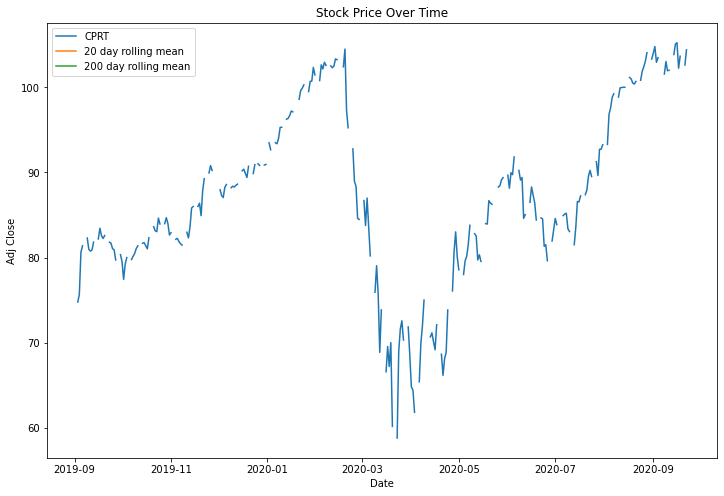

KeyError: 'Date'

In [9]:
get_data(USA_STOCKS)